#**Julián Camilo Jiménez Cruz & Rafael Leonardo Pinzon**


Dataset utilizado: CIFAR10,
tomado de la libreria de keras : https://keras.io/api/datasets/cifar10/ 

Este dataset cuenta con 50,000 32x32 imagenes a color de entrenamiento y 10,000 imagenes de test

Las clases que tiene el dataset son:

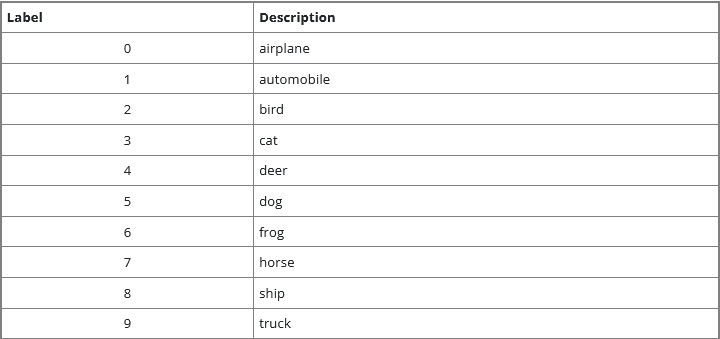

In [107]:
#Cargar librerias keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1) #semilla
from keras.datasets import cifar10 #Cargar el conjunto de datos
from keras.utils import np_utils # Para generar las múltiples clases
from keras.layers.convolutional import Conv2D, MaxPooling2D # Para las capas convolucionales
from keras.layers.core import Flatten, Dense #Red neuronal Común

In [108]:
#El modulo cifar10 permite separar de forma automática este set de entrenamiento
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


#Preprocesamiento de los datos

In [109]:
#Normalizar los datos:
#Como son imágenes, los valores de los pixeles oscilan entre 0 y 255
#Pero se requiere que estén entre 0 y 1, por tanto se dividen entre 255

X_train = x_train/255.0
X_test = x_test/255.0

In [110]:
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

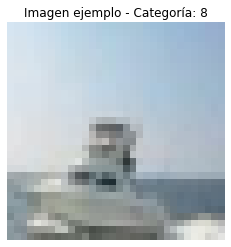

In [111]:
#Visualizar una imagen
nimagen = 100
plt.imshow(X_train[nimagen,:].reshape(32,32,3), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(Y_train[nimagen])))
plt.axis('off')
plt.show()

In [112]:
#Indicar que solo se usará un canal de color (escala de grises)
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [113]:
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)))
modelo.add(tf.keras.layers.MaxPooling2D((2, 2)))
modelo.add(tf.keras.layers.Conv2D(64, (3, 3), activation='elu'))
modelo.add(tf.keras.layers.MaxPooling2D((2, 2)))
modelo.add(tf.keras.layers.Conv2D(64, (3, 3), activation='elu'))


#Aplanar la red para que se convierta en vector y crear la red neuronal con tres capas ocultas
modelo.add(Flatten())
modelo.add(Dense(1024,activation='elu'))
modelo.add(Dense(1024,activation='elu'))
modelo.add(Dense(1024,activation='elu'))
modelo.add(Dense(nclasses,activation='sigmoid'))

In [114]:
modelo.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 1024)             

#Compilación

In [115]:
#Compilar el modelo 
#Se usa el optimizer SGD porque es un ejemplo multiclase
import tensorflow as tf
from tensorflow import keras
modelo.compile(tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.96, nesterov=True), loss= 'categorical_crossentropy',
  metrics=['accuracy'])

#Entrenamiento

In [117]:
#Entrenar el modelo
#Se harán 30 iteraciones, en lotes de 128 y que se imprima la información. Con validation_data evalúa de una vez
#la precisión
modeloEntrenado = modelo.fit(X_train, Y_train, epochs=30, batch_size=128, verbose=1, validation_data=(X_test,Y_test))

Epoch 1/30
391/391 [==============================] - 6s 16ms/step - loss: 0.1272 - accuracy: 0.9636 - val_loss: 2.1266 - val_accuracy: 0.7265
Epoch 2/30
391/391 [==============================] - 6s 17ms/step - loss: 0.1322 - accuracy: 0.9631 - val_loss: 2.1531 - val_accuracy: 0.7173
Epoch 3/30
391/391 [==============================] - 6s 16ms/step - loss: 0.1443 - accuracy: 0.9589 - val_loss: 2.3185 - val_accuracy: 0.7212
Epoch 4/30
391/391 [==============================] - 6s 16ms/step - loss: 0.1526 - accuracy: 0.9592 - val_loss: 2.2571 - val_accuracy: 0.7095
Epoch 5/30
391/391 [==============================] - 6s 16ms/step - loss: 0.1388 - accuracy: 0.9619 - val_loss: 2.7205 - val_accuracy: 0.7054
Epoch 6/30
391/391 [==============================] - 6s 16ms/step - loss: 0.1537 - accuracy: 0.9604 - val_loss: 2.4847 - val_accuracy: 0.7113
Epoch 7/30
391/391 [==============================] - 6s 16ms/step - loss: 0.1512 - accuracy: 0.9604 - val_loss: 2.5517 - val_accuracy: 0.7039

#Gráficas

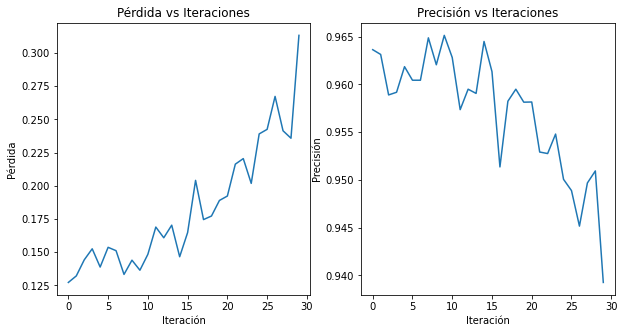

In [118]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('Pérdida vs Iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('Precisión vs Iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

#Validación

In [119]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 68.3%


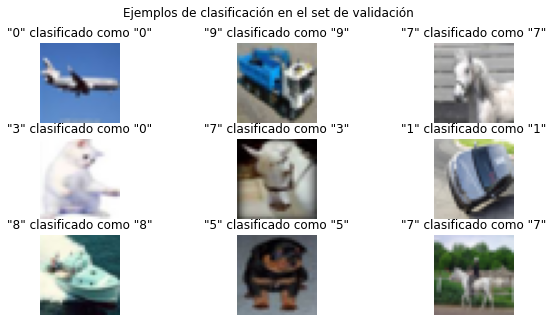

In [120]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(32,32,3)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()

#Matriz de confusión

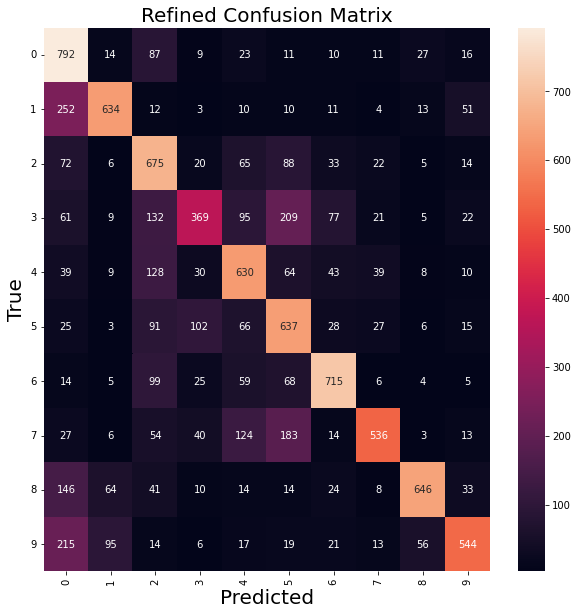

In [121]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = ['0','1','2','3','4','5','6','7','8','9']
y_true=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, classes_y)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

#Datos de cada categoría

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.DataFrame(y_test, columns = ['Número'])
conteo=Counter(y_test)
conteo_ordenado = [0 for i in range(10)]
print(conteo)
for num, cont in conteo.items():
  conteo_ordenado[num] = cont 
print(conteo_ordenado)

fig, ax = plt.subplots() 
ind = np.arange(len(conteo_ordenado))  #ubicaciones de los grupos
width = 0.5  #ancho de la barra
ax.barh(ind, conteo_ordenado, width, color = "green") 

ax.set_yticks(ind+width/2)  
ax.set_yticklabels(class_names, minor=False)
plt.ylabel('Cantidad de ocurrencias')
plt.xlabel('Números')
plt.title('Datos para validación')
for i, v in enumerate(conteo_ordenado):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

#Conclusiones

> Al construir el modelo implementando una red neuronal convolucional para el dataset CIFAR10. Utilizamos tres neuronas ( una con un filtro de 32 y las dos restantes con filtros de 64), también utilizamos tres capas ocultas de 1024 y usamos la función de activación ELU ya que encontramos que esta versión puede acelerar la convergencia y mejora la precisión, ya que, tiene valores negativos y permite hacer un promedio a valores más cercanos a 0 con menor complejidad computacional.

> A la hora de compilar el modelo usamos el optimizer SGD porque es un ejemplo multiclase y le pusimos como parámetros (learning_rate=0.01, decay=1e-6, momentum=0.96, nesterov=True). Con eso valores logramos incrementar el val_accuracy un 0.04%.

> En el entrenamiento hicimos 30 iteraciones, en lotes de 128 y pudimos observar los siguientes datos que arrojó el entrenamiento: loss: 0.1318 - accuracy: 0.9640 - val_loss: 2.2512 - val_accuracy: 0.7097. Con estos datos llegamos a la conclusión de que el modelo es adecuado y tiene una gran consistencia según la precisión y la pérdida, pero el valor de precisión fue inferior a 90% .